# Part 1: Exploring the friendship paradox. 

This first part draws on the friendship paradox exercise from Week 3. You should provide solutions to the following exercises from **Part 3** of that week.

* *The friendship paradox in BA networks*
* *The friendship paradox more generally*
* *The friendship paradox and the configuration model*
* *Growth without preferential attachment*


### *The friendship paradox in BA networks*

In [70]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

> * Compare the two numbers to check if it's true that $i$'s friends (on average) have more friends than $i$.

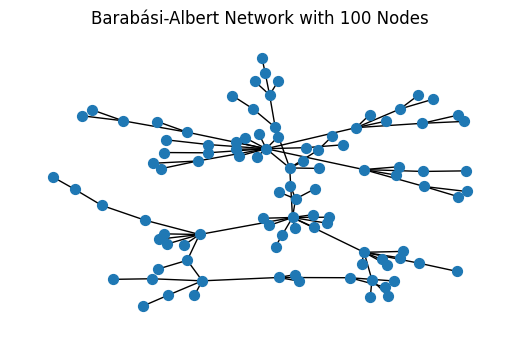

Maximum degree: 127
Minimum degree: 1


In [71]:
# Create a graph
BA = nx.Graph()

# Create a single link
BA.add_edge(0, 1)

# Function to add a node with preferential attachment
def add_node_with_preferential_attachment(G):
    # Create a list of nodes where nodes appear proportional to their degree
    nodes = list(G.nodes)
    node_list = []
    for node in nodes:
        # Append each node by the number of times equal to its degree
        node_list.extend([node] * G.degree[node])

    # Randomly choose a node to connect to from this list (preferential attachment)
    
    new_node = len(G.nodes)
    connected_node = random.choice(node_list)
    G.add_edge(new_node, connected_node)

# Add 100 nodes with preferential attachment
random.seed(6)
while len(BA.nodes) < 100:
    add_node_with_preferential_attachment(BA)

# Plot the network after 100 nodes with reduced figure size
plt.figure(figsize=(5, 3))
nx.draw(BA, node_size=50, with_labels=False)
plt.title("Barabási-Albert Network with 100 Nodes")
plt.show()

# Add till 5000 nodes
random.seed(6)
while len(BA.nodes) < 5000:
    add_node_with_preferential_attachment(BA)

# Find the maximum and minimum degree
degrees = dict(BA.degree()).values()
max_degree = max(degrees)
min_degree = min(degrees)
print(f"Maximum degree: {max_degree}")
print(f"Minimum degree: {min_degree}")

# # Bin the degree distribution using numpy.histogram
# degree_sequence = sorted([d for n, d in BA.degree()], reverse=True)  # degree sequence
# hist, bin_edges = np.histogram(degree_sequence, bins=50)

# # Plot the degree distribution
# plt.figure(figsize=(10, 5))

# # Linear scale plot
# plt.subplot(1, 2, 1)
# plt.scatter(bin_edges[1:], hist, marker='o', linestyle='None')
# plt.xlabel("Degree")
# plt.ylabel("Count")
# plt.title("Degree Distribution (Linear Scale)")

# # Log-log scale plot
# plt.subplot(1, 2, 2)
# plt.loglog(bin_edges[1:], hist, marker='o', linestyle='None')
# plt.xlabel("Degree (log scale)")
# plt.ylabel("Count (log scale)")
# plt.title("Degree Distribution (Log-Log Scale)")

# plt.tight_layout()
# plt.show()



> * Do this 1000 times. How many out of those 1000 times is the friendship paradox true in **F-BA**?

In [72]:
count = 0
random.seed(6)
for j in range(1000):
    # Get a random node from BA
    i = random.choice(list(BA.nodes))

    # Get the node degree
    degree = BA.degree[i]

    # Get the neighbors of the node
    neighbors = list(BA.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([BA.degree[n] for n in neighbors])

    # Print the results
    # print(f"Node {i} has degree {degree}")
    # print(f"Node {i} has neighbors {neighbors}")
    # print(f"Node {i} has neighbors with average degree {avg_degree}")

    if degree < avg_degree:
        count += 1

# Print F-BA paradox count
print(f"Number of times the F-BA paradox occurs: {count}")

Number of times the F-BA paradox occurs: 850


### *The friendship paradox more generally*

> * What if the power law is flatter, e.g. $p(k) \sim k^{-\gamma}$ with $\gamma = 2$? Will the fraction of times the paradox is true be higher or lower?

When  $\gamma$  = 2, the power-law distribution is flatter, which means the friendship paradox will be more prevalent because high-degree nodes (hubs) are more common; hence, more likely to be selected as friends. Conversely, as $\gamma$ increases, the paradox becomes less prevalent because the distribution favors low-degree nodes.

> - Did you reason correctly above? For what fraction of the time is the friendship paradox true for your network with a new slope?

In [73]:
# Parameters for power-law distribution
alpha = 2  # Power-law exponent
x_min = 1   # Minimum degree
num_nodes = 5000  # Number of nodes

# Generate a power-law degree sequence
def generate_power_law_sequence(alpha, x_min, size):
    # Generate uniformly distributed random numbers
    r = np.random.uniform(0, 1, size)
    # Transform to get power-law distributed degrees
    degrees = x_min * (1 - r) ** (-1 / (alpha - 1))
    # Round to integers
    degrees = np.round(degrees).astype(int)
    return degrees

# Generate degree sequence
random.seed(6)
np.random.seed(6)  # Ensure numpy also uses the same seed
degree_sequence = generate_power_law_sequence(alpha, x_min, num_nodes)

# Ensure the sum of the degree sequence is even
if np.sum(degree_sequence) % 2 != 0:
    # If sum is odd, add 1 to a random degree to make it even
    degree_sequence[np.random.randint(0, num_nodes)] += 1

# Create the network using the configuration model
BAF = nx.configuration_model(degree_sequence)

# Remove self-loops and parallel edges
BAF = nx.Graph(BAF)  # Convert to simple graph
BAF.remove_edges_from(nx.selfloop_edges(BAF))

In [74]:

count = 0
random.seed(6)
for j in range(1000):
    # Get a random node from BA
    i = random.choice(list(BAF.nodes))

    # Get the node degree
    degree = BAF.degree[i]

    # Get the neighbors of the node
    neighbors = list(BAF.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([BAF.degree[n] for n in neighbors])

    # Print the results
    # print(f"Node {i} has degree {degree}")
    # print(f"Node {i} has neighbors {neighbors}")
    # print(f"Node {i} has neighbors with average degree {avg_degree}")

    if degree < avg_degree:
        count += 1

# Print F-BA paradox count
print(f"Number of times the F-BA flatter paradox occurs: {count}")

Number of times the F-BA flatter paradox occurs: 972


The previous reasoning is suported by the results, the original F-BA paradox occurs around 85% of the times, compared with the flatter F-BA paradox that has a prevalence of 97%.

###  *The friendship paradox and the configuration model*

> - Now generate a network for the configuration model that has *the same slope and number of nodes as **F-BA** in A above*; let's call this new network **F-CM** (for *friendship configuration model*). 
>    - What fraction of the time is the friendship paradox is true for the **F-CM** network?

In [75]:
# Doing the F-CM friendship configuration model
# Degree sequence of the BA network
degree_sequence = [d for n, d in BA.degree()]

# Generate the configuration model based on the degree sequence
FCM = nx.configuration_model(degree_sequence)
FCM = nx.Graph(FCM)  # Convert to simple graph (removes parallel edges and self-loops)

count = 0
random.seed(6)
for j in range(1000):
    # Get a random node from BA
    
    i = random.choice(list(FCM.nodes))

    # Get the node degree
    degree = FCM.degree[i]

    # Get the neighbors of the node
    neighbors = list(FCM.neighbors(i))

    # Calculate average degree of the neighbors
    avg_degree = np.mean([FCM.degree[n] for n in neighbors])

    if degree < avg_degree:
        count += 1

# Print F-CM paradox count
print(f"Number of times the F-CM paradox occurs: {count}")

Number of times the F-CM paradox occurs: 618


>    - Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics
>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).
>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

While degree distribution is crucial in determining how frequently the friendship paradox holds, several other network properties can influence the outcome. Below are key factors:

* **Assortativity (Degree Correlation)**

**Definition**: Assortativity is a measure of how nodes with similar degrees tend to connect. In assortative networks, high-degree nodes are more likely to connect to other high-degree nodes, whereas in disassortative networks, high-degree nodes connect more frequently to low-degree nodes.

**Impact on Friendship Paradox**: The friendship paradox is more likely to occur in disassortative networks because high-degree nodes tend to have low-degree neighbors, causing most nodes to see higher average neighbor degrees. In assortative networks, nodes of similar degrees cluster, reducing the likelihood of the paradox. Therefore, F-BA and F-CM might differ in assortativity, potentially affecting how often the paradox holds.

* **Clustering Coefficient (Triadic Closure)**

**Definition**: The clustering coefficient measures the degree to which nodes in a network tend to form closed triplets or triangles (i.e., if two neighbors of a node are also neighbors of each other).

**Impact on Friendship Paradox**: Networks with high clustering tend to have tightly-knit communities where node degrees are more similar, reducing the friendship paradox's effect. Barabási-Albert (BA) networks typically exhibit low clustering because of their tree-like, hub-and-spoke structure, while configuration models can exhibit more diverse clustering patterns. If F-BA and F-CM differ significantly in clustering, it could lead to variations in how frequently the paradox is observed.

* **Community Structure**

**Definition**: Community structure refers to how nodes are grouped into distinct clusters or subgroups, with more connections within groups than between them.

**Impact on Friendship Paradox:** Networks with pronounced community structures can have localized effects on degree distribution and neighbor degrees. In a network where community structure is strong, nodes in the same community may have more similar degrees, thereby reducing the friendship paradox's occurrence within that community. Since the Barabási-Albert model tends to create more global hubs without strong community structure, while the configuration model could potentially generate more localized communities depending on its rewiring, F-BA and F-CM may differ in this respect.

* **Path Length and Network Diameter**

**Definition**: Path length is the average number of steps along the shortest paths for all possible pairs of nodes. The diameter is the longest shortest path between any two nodes.

**Impact on Friendship Paradox**: Networks with shorter path lengths may lead to more connectedness and faster dissemination of connections, influencing how nodes are connected across degrees. While BA networks tend to have a small-world nature (short path lengths), configuration models with the same degree distribution may or may not exhibit this characteristic, depending on their structure. This could indirectly influence the friendship paradox as well.

In [76]:
# Function to compute the paradox fraction with bootstrapping
def bootstrap_paradox_fraction(G, num_samples=1000):
    paradox_fractions = []
    np.random.seed(6)
    for _ in range(num_samples):
        sample_nodes = np.random.choice(list(G.nodes), size=G.number_of_nodes(), replace=True)
        paradox_count = 0
        for node in sample_nodes:
            degree = G.degree[node]
            neighbors_degrees = [G.degree[n] for n in G.neighbors(node)]
            if neighbors_degrees:
                avg_neighbor_degree = np.mean(neighbors_degrees)
                if avg_neighbor_degree > degree:
                    paradox_count += 1
        paradox_fractions.append(paradox_count / len(sample_nodes))
    return np.mean(paradox_fractions), np.std(paradox_fractions)

# Example for F-BA and F-CM
mean_fba, std_fba = bootstrap_paradox_fraction(BA)
mean_fcm, std_fcm = bootstrap_paradox_fraction(FCM)

print(f"F-BA Paradox Fraction: {mean_fba:.4f} ± {std_fba:.4f}")
print(f"F-CM Paradox Fraction: {mean_fcm:.4f} ± {std_fcm:.4f}")

# TAKES TOO LONG TO RUN IDK IF IT WORKS
# # Plotting with error bars
# fractions_FBA = [bootstrap_paradox_fraction(BA)[0] for _ in range(100)]
# fractions_FCM = [bootstrap_paradox_fraction(FCM)[0] for _ in range(100)]

# plt.errorbar(x=['F-BA', 'F-CM'], y=[np.mean(fractions_FBA), np.mean(fractions_FCM)], 
#              yerr=[np.std(fractions_FBA), np.std(fractions_FCM)], fmt='o', capsize=5)
# plt.ylabel("Fraction of Nodes with Friendship Paradox")
# plt.title("Friendship Paradox Comparison in F-BA and F-CM")
# plt.show()

F-BA Paradox Fraction: 0.8609 ± 0.0050
F-CM Paradox Fraction: 0.6446 ± 0.0070


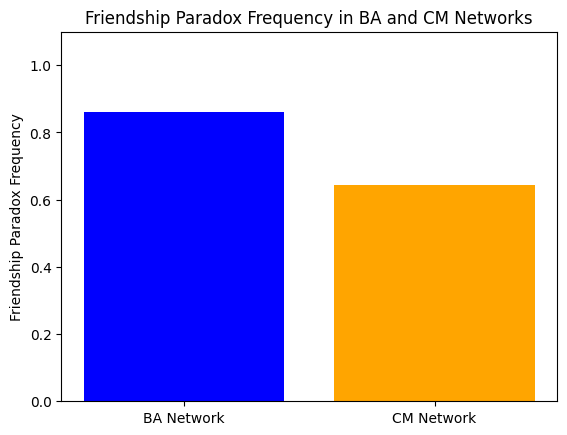

In [77]:
plt.bar(['BA Network', 'CM Network'], [mean_fba, mean_fcm], color=['blue', 'orange'])
plt.ylabel('Friendship Paradox Frequency')
plt.title('Friendship Paradox Frequency in BA and CM Networks')
plt.ylim([0, 1.1])
plt.show()

### *Growth without preferential attachment*

Finally, we'll build a network of same size and degree as in the exercise above, *using the growth mechanism without the preferential attachment*. Follow the steps below for success
> 
>  1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.
>  2. Generate an ER network of same number of nodes and links as the Sune-network. 
> * What are the differences between the ER network and the Sune-network? Explain in your own words. 
>   * *Hints*: To get started, plot the two degree distribution in the same plot. Compare and contrast. Another revealing network property to study is the the number of connected components.

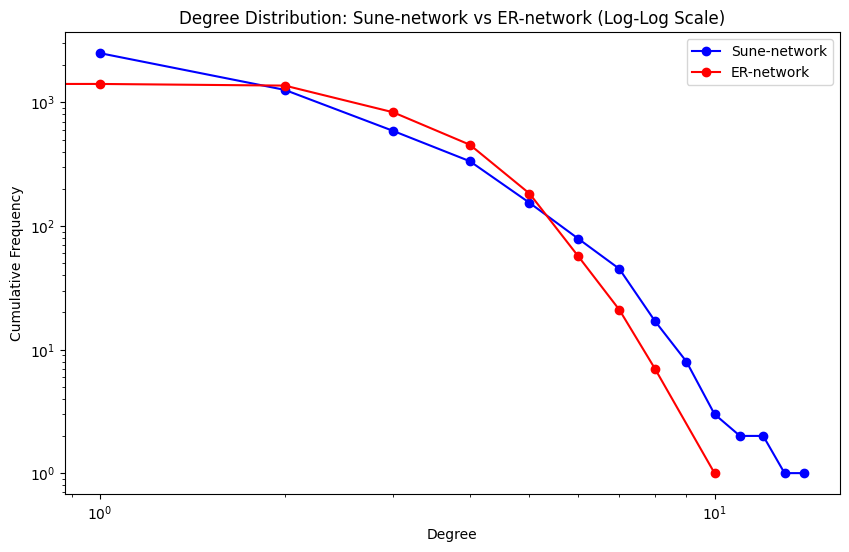

Number of connected components in Sune-network: 1
Number of connected components in ER-network: 806


In [78]:
# Generate the Sune-network
def grow_sune_network(num_nodes):
    G = nx.Graph()
    
    # Start with a single edge between two nodes
    G.add_edge(0, 1)

    random.seed(6)
    # Add nodes one by one
    for new_node in range(2, num_nodes):
        existing_nodes = list(G.nodes)
        # Connect the new node to a random existing node (equal probability)
        connected_node = random.choice(existing_nodes)
        G.add_edge(new_node, connected_node)
    
    return G

# Generate the Sune-network with 5000 nodes
sune_network = grow_sune_network(5000)

# Generate an ER network with the same number of nodes and edges as the Sune-network
num_edges_sune = sune_network.number_of_edges()

# Calculate the edge probability for the ER graph based on the number of edges
num_nodes = 5000
p = 2 * num_edges_sune / (num_nodes * (num_nodes - 1))

# Generate the ER network
er_network = nx.erdos_renyi_graph(num_nodes, p)

# Plot and compare the degree distributions
def plot_degree_distribution(G, label, color):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = np.bincount(degree_sequence)
    degrees = np.nonzero(degree_count)[0]
    plt.plot(degrees, degree_count[degrees], 'o-', label=label, color=color)

plt.figure(figsize=(10, 6))
plot_degree_distribution(sune_network, 'Sune-network', 'blue')
plot_degree_distribution(er_network, 'ER-network', 'red')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Cumulative Frequency')
plt.title('Degree Distribution: Sune-network vs ER-network (Log-Log Scale)')
plt.legend()
plt.show()

# Compare the number of connected components
num_components_sune = nx.number_connected_components(sune_network)
num_components_er = nx.number_connected_components(er_network)

print(f"Number of connected components in Sune-network: {num_components_sune}")
print(f"Number of connected components in ER-network: {num_components_er}")

* **Degree Distribution**

    * The Sune-network will have a broader degree distribution, with some nodes having significantly more connections than others but not as extreme as the Barabási-Albert model.

    * The ER-network typically has a more concentrated degree distribution (closer to a Poisson distribution), where most nodes have degrees near the average, and very few nodes deviate significantly from it.

* **Connected Components**

    * The Sune-network is likely to form a single connected component since each new node attaches to an existing one, ensuring connectivity.

    * The ER-network might have more than one connected component if the edge probability is not high enough, but generally, with enough edges, the largest connected component can encompass most nodes.
    
By comparing the degree distribution and the number of connected components, you can better understand how structural properties like randomness and attachment rules impact the overall topology of the network.

# Part 2: Stats of the Country Music Network

This second part requires you to have built the network of Country Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Simple network statistics and analysis*

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.